<a href="https://colab.research.google.com/github/XimenaBG/Projects_Data_Analyst_in_Python/blob/main/Visualizing_Earnings_Based_On_College_Majors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guided Project: Visualizing Earnings Based On College Majors**

In this project, I am going to work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.<br>
The original data file was published by the [American Community Survey,](https://www.census.gov/programs-surveys/acs/) which conducts surveys and aggregates the data.<br>
However, all the analysis and graphs that will appear in this notebook will be generated from the cleaned dataset released by FiveThirtyEight on their [Github repo.](https://github.com/fivethirtyeight/data/tree/master/college-majors) <br>
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 
<br><br>
The following are some of the columns in the file:

`Rank` - Rank by median earnings (the dataset is ordered by this column).<br>
`Major_code` - Major code.<br>
`Major` - Major description.<br>
`Major_category` - Category of major.<br>
`Total` - Total number of people with major.<br>
`Sample_size` - Sample size (unweighted) of full-time.<br>
`Men` - Male graduates.<br>
`Women` - Female graduates.<br>
`ShareWomen` - Women as share of total.<br>
`Employed` - Number employed.<br>
`Median` - Median salary of full-time, year-round workers.<br>
`Low_wage_jobs` - Number in low-wage service jobs.<br>
`Full_time` - Number employed 35 hours or more.<br>
`Part_time` - Number employed less than 35 hours.

## **Objective:**
The aim of this project is to answer the following questions using different types of graphs, like scatter, bars, histograms, etc.:
<br>
1. Do students in more popular majors make more money?<br>
2. How many majors are predominantly male? Predominantly female?<br>
3. Which category of majors have the most students?<br>

In [1]:
#import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Charge the dataset that is in my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the dataset
recent_grads = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recent-grads.csv')

In [5]:
#return the first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
#to become familiar with how the data is structured
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [8]:
#to generate summary statistics for all of the numeric columnsrecent_grads.describe()

**Cleaning the dataset:** Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [9]:
#number of rows
raw_data_count = recent_grads.count(axis=1)

In [10]:
# to drop rows containing missing values
recent_grads = recent_grads.dropna()

In [11]:
#count again number of rows
cleaned_data_count = recent_grads.count(axis=1)

In [12]:
print('Rows:',len(raw_data_count))
print('Rows_cleaned', len(cleaned_data_count))

Rows: 173
Rows_cleaned 172


## **Pandas, scatter plot:**

**1. Sample_size vs Median:**<br>
In this graph we can observe two dots that are far away from the other data: the first one a salary of more than 100.000 for a sample size of 0. This point maybe is an error of the dataset and it isn't relevant for the analysis. The second one is a point in the bottom left, unlike the first one this point shows a relationship between a sample size of more than 5.000 people with an annual salary of around 40.000 that is information very relevant.
<br>
In conclusion from this graph the only thing that we can obtain is that maybe the information of the salary of the people employed full time is not enough to make an asseveration about the salaries.

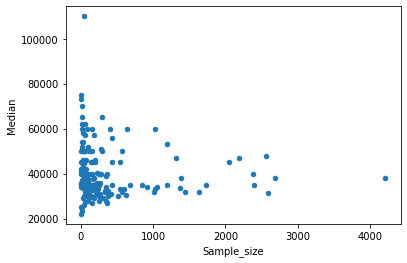

In [13]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

**2. Sample_size vs Unemployment_rate:**<br>


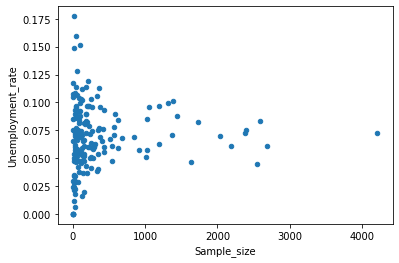

In [14]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

**3. Full_time vs Median:**

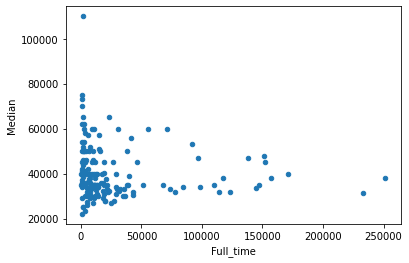

In [15]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')

**4. ShareWomen vs Unemployment_rate:**

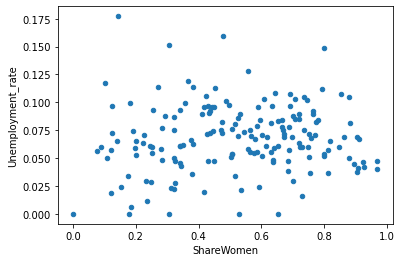

In [16]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

The pattern that shows the scatter plot 4 is not enough to conclude something about the unemployment rate. Because independent of the percentage of women in each major the unemployment rate seem not to change very much.

**5. Men vs Median:**

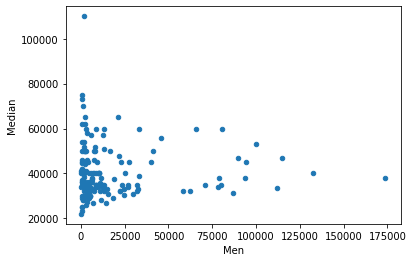

In [17]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')

**6. Women vs Median:**


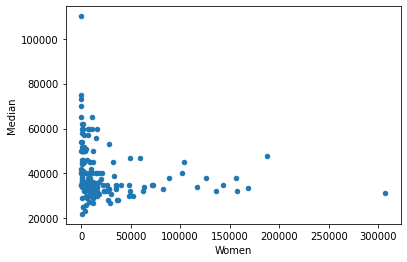

In [18]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')

When we compare the graphs 5 and 6 we can see the gap between women and men median salary because of the patterns.<br>
The graph 6 shows most of the data concentrated in the bottom left under the 40000 (Women), on the other hand the scatter graph 6 shows more points above 40000 (Men) and data less concentrated in the bottom left.

## **Pandas, histogram plot:**

**1. Sample size:** Sample size of full time employees.

(0.0, 3000.0)

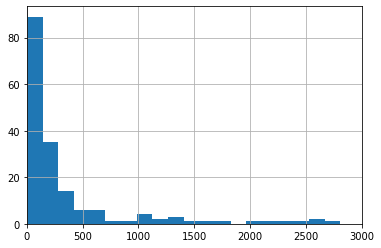

In [19]:
recent_grads['Sample_size'].hist(bins=30)
plt.xlim(0, 3000)

As we can see the sample sizes are small. Because most of the major have no more than 500 people information about full time employees.

**2. Median:** Median salary of full time, year round workers.

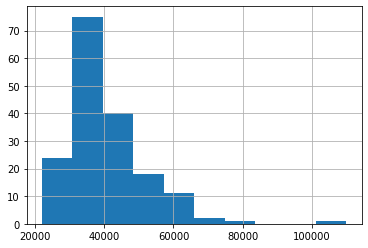

In [20]:
recent_grads['Median'].hist(bins=10)

The annual salary of full time workers is about 30000 or 40000. Independent of the gender and the major.


**3. Employed:** Number employed.

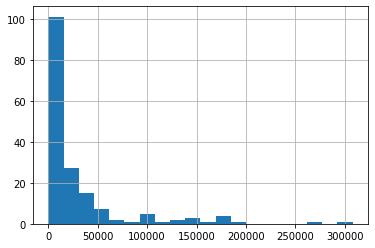

In [21]:
recent_grads['Employed'].hist(bins=20)

**4. Full time:** Number employed 35 hours or more.

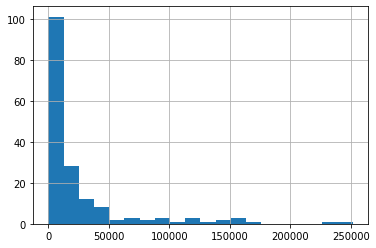

In [22]:
recent_grads['Full_time'].hist(bins=20)

If we compare the graphs 3 and 4 we can see a slight difference. This is because people employed less than 35 hours are less than people employed full time.

**5. Share women:** Women as share of total.

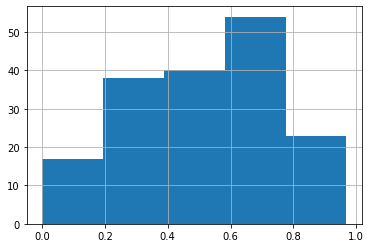

In [23]:
recent_grads['ShareWomen'].hist(bins=5)

With this graph we can observe that there is no major without men because the data to create the histogram can't reach the value of 100%. Another thing that we can observe from this graph is that most majors have around 50% of women graduated.

**6. Unemployment rate:** 

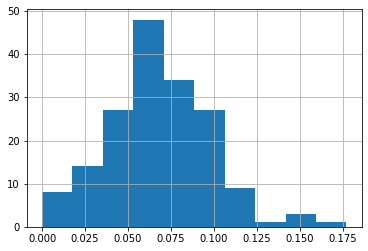

In [24]:
recent_grads['Unemployment_rate'].hist(bins=10)

**7. Men:** Male graduates.

(0.0, 200000.0)

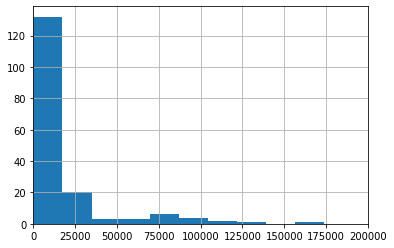

In [25]:
recent_grads['Men'].hist(bins=10)
plt.xlim(0,200000)

**8. Women:** Female graduates.

(0.0, 200000.0)

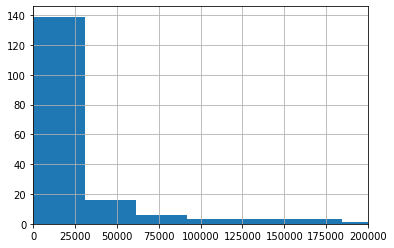

In [26]:
recent_grads['Women'].hist(bins=10)
plt.xlim(0, 200000)

Finally, from the comparisson of the last two graphs (7 and 8) about men and female graduates, we observe that women seems to finish their careers more than men.

## **Pandas, scatter matrix plot:**

**1. Women, Men:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3493ae80>,
      dtype=object)

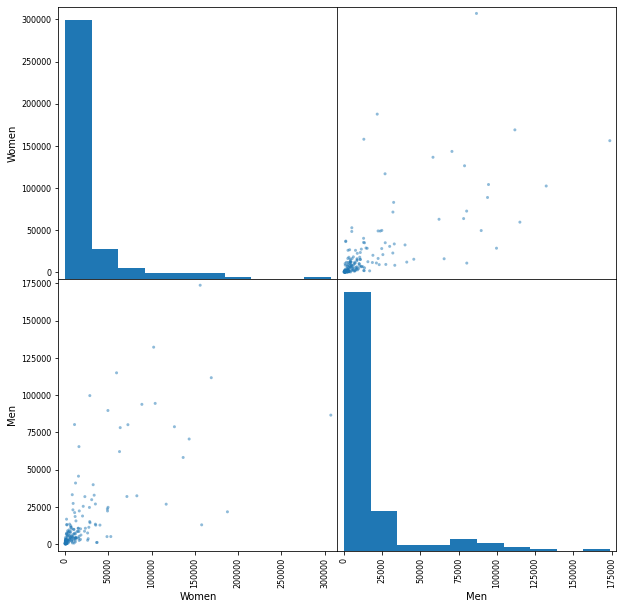

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

**2. Sample size, median:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3473ca58>,
      dtype=object)

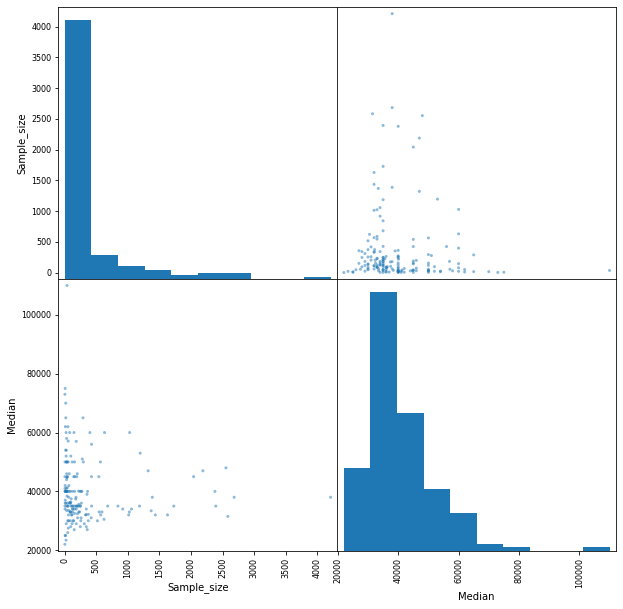

In [28]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

**3. Sample size, Median, Unemployment rate:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f345fa668>,
      dtype=object)

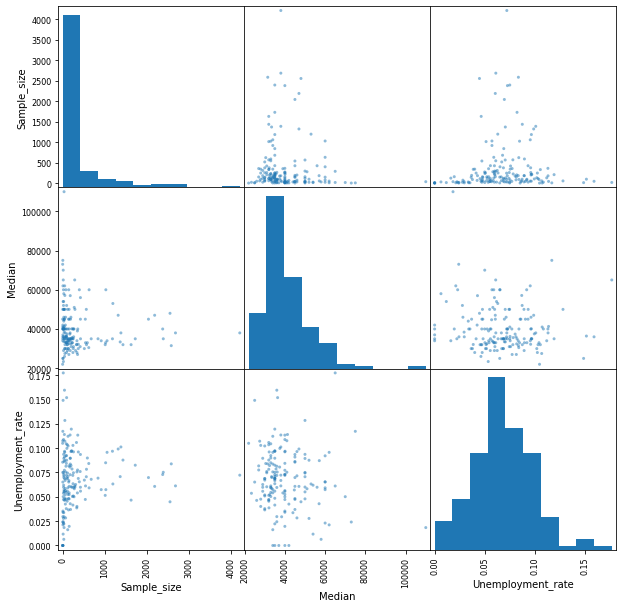

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## **Pandas, bar plot:**

**1. Share women, unemployment rate:**

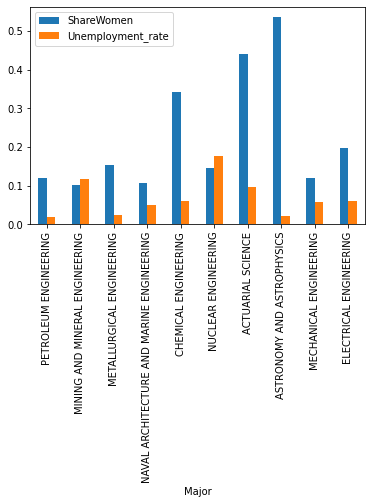

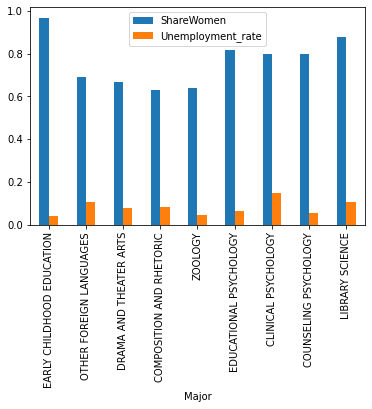

In [30]:
cols = ['ShareWomen', 'Unemployment_rate']
recent_grads[:10].plot.bar(x='Major', y= cols)
recent_grads[163:].plot.bar(x='Major', y= cols)